In [10]:
from qiskit import *

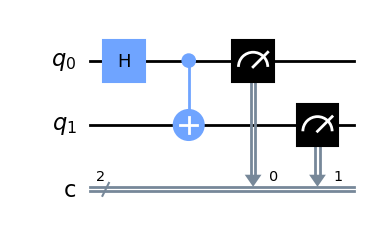

In [20]:
circuit = QuantumCircuit(2,2) # Create a Quantum Circuit with 2 qubits and 2 classical bits
circuit.h(0) # apply hadamard gate
circuit.cx(0,1) # cnot gate; 0 => control bit, 1 => target bit
circuit.measure([0,1],[0,1]) # apply a measurement on [0,1] qubits and store measurements in [0,1] cbits
%matplotlib inline
circuit.draw(output='mpl')

In [21]:
IBMQ.save_account(open('key.txt', 'r').read()) # store your api key in key.txt file 

configrc.store_credentials:WARNING:2023-09-13 21:24:21,974: Credentials already present. Set overwrite=True to overwrite.


In [22]:
IBMQ.load_account() # access qiskit account

ibmqfactory.load_account:WARNING:2023-09-13 21:24:22,595: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
Aer.backends() # print all the Aer simulators 

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [24]:
provider = IBMQ.get_provider("ibm-q") # actual quantum computers and not simulations 

In [25]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [26]:
def get_qubit_count(): # gives the quantum computers currently available with the number of qubits they support
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = "simulated"

        print(f"{backend.name()} : {qubit_count}")

    

In [27]:
get_qubit_count()

ibmq_qasm_simulator : simulated
ibmq_lima : 5
ibmq_belem : 5
ibmq_quito : 5
simulator_statevector : simulated
simulator_mps : simulated
simulator_extended_stabilizer : simulated
simulator_stabilizer : simulated
ibmq_jakarta : 7
ibmq_manila : 5
ibm_lagos : 7
ibm_nairobi : 7
ibm_perth : 7


In [28]:
quantum_computer = provider.get_backend("ibmq_lima") # select an available quantum computer

In [30]:
import qiskit.tools.jupyter
%qiskit_job_watcher

job = execute(circuit, backend=quantum_computer) # execute the quantum circuit on the specified quantum computer backend

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)